In [8]:
import json
import os
import pandas as pd
import random

In [9]:
cwd = os.getcwd()
parent = os.path.dirname(cwd)
src_path = os.path.join(parent, 'src')
all_shortest_paths_path = os.path.join(src_path, 'all_shortest_paths.json')
pairs_path = os.path.join(src_path, 'pairs.json')

In [10]:
#read the data from the file
with open("comarques_limitrofes.json") as f:
    comarques_adjacents = json.load(f)
    
df = pd.read_json(all_shortest_paths_path)

In [14]:
df_len = df.map(lambda x: len(x[0]))

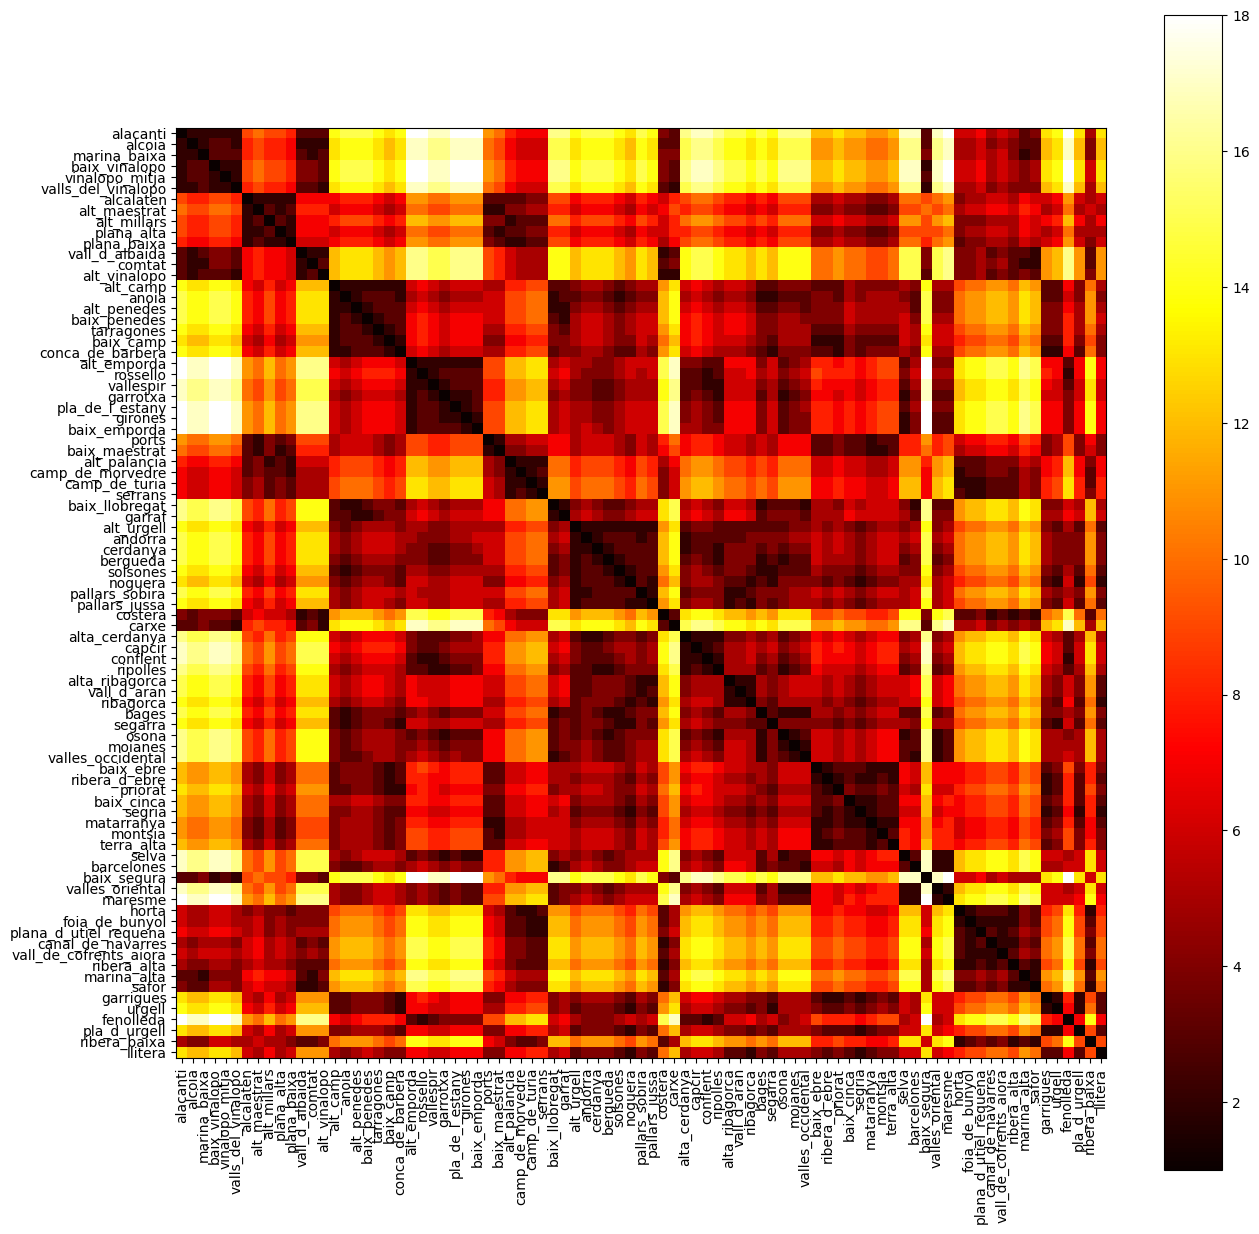

In [12]:
# plot df len in a heatmap using matplotlib using names of comarques as labels
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.imshow(df_len, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_len.columns)), df_len.columns, rotation=90)
plt.yticks(range(len(df_len.index)), df_len.index)
plt.show()


In [13]:
# Filter pairs with a length of 3 or more
filtered_pairs = df_len[df_len >= 4]

# Randomize the pairs
randomized_pairs = filtered_pairs.stack().sample(frac=1).reset_index()

# Create the pairs dictionary
pairs_dict = {}
for i, row in randomized_pairs.iterrows():
    pairs_dict[i + 1] = {"start": row['level_0'], "end": row['level_1']}

# Save the result to pairs.json
with open(pairs_path, 'w') as f:
    json.dump(pairs_dict, f, indent=4)